<a href="https://colab.research.google.com/github/Taylor-Tian/hello-world/blob/master/tf_CNN_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


--2020-05-25 00:08:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  73.2MB/s    in 0.9s    

2020-05-25 00:08:50 (73.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 9s - loss: 0.6886 - accuracy: 0.5460 - val_loss: 0.6977 - val_accuracy: 0.5150
Epoch 2/100
100/100 - 8s - loss: 0.6548 - accuracy: 0.6125 - val_loss: 0.7299 - val_accuracy: 0.5210
Epoch 3/100
100/100 - 9s - loss: 0.5986 - accuracy: 0.6745 - val_loss: 0.5940 - val_accuracy: 0.6690
Epoch 4/100
100/100 - 9s - loss: 0.5623 - accuracy: 0.7100 - val_loss: 0.5776 - val_accuracy: 0.6900
Epoch 5/100
100/100 - 9s - loss: 0.5357 - accuracy: 0.7250 - val_loss: 0.5589 - val_accuracy: 0.7110
Epoch 6/100
100/100 - 9s - loss: 0.5089 - accuracy: 0.7465 - val_loss: 0.5617 - val_accuracy: 0.7290
Epoch 7/100
100/100 - 9s - loss: 0.4821 - accuracy: 0.7700 - val_loss: 0.5505 - val_accuracy: 0.7070
Epoch 8/100
100/100 - 9s - loss: 0.4661 - accuracy: 0.7655 - val_loss: 0.5506 - val_accuracy: 0.7160
Epoch 9/100
100/100 - 9s - loss:

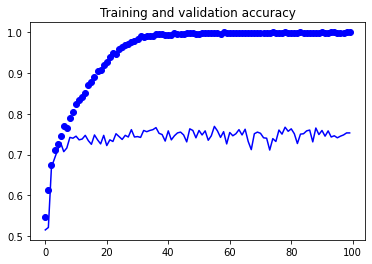

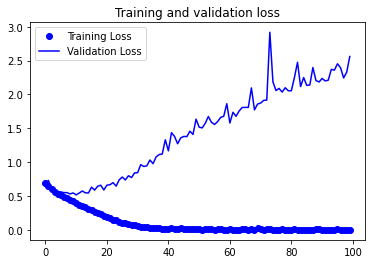

In [2]:

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.6932 - accuracy: 0.5175 - val_loss: 0.6749 - val_accuracy: 0.6020
Epoch 2/100
100/100 - 17s - loss: 0.6806 - accuracy: 0.5630 - val_loss: 0.6551 - val_accuracy: 0.5940
Epoch 3/100
100/100 - 17s - loss: 0.6662 - accuracy: 0.5910 - val_loss: 0.6312 - val_accuracy: 0.6530
Epoch 4/100
100/100 - 17s - loss: 0.6452 - accuracy: 0.6295 - val_loss: 0.6083 - val_accuracy: 0.6530
Epoch 5/100
100/100 - 17s - loss: 0.6412 - accuracy: 0.6270 - val_loss: 0.6039 - val_accuracy: 0.6590
Epoch 6/100
100/100 - 17s - loss: 0.6234 - accuracy: 0.6450 - val_loss: 0.5781 - val_accuracy: 0.6870
Epoch 7/100
100/100 - 17s - loss: 0.6008 - accuracy: 0.6615 - val_loss: 0.5809 - val_accuracy: 0.6720
Epoch 8/100
100/100 - 17s - loss: 0.6017 - accuracy: 0.6700 - val_loss: 0.5531 - val_accuracy: 0.7180
Epoch 9/100
100/100 - 17s - loss: 0.5899 - accuracy: 0.6790 - val_loss: 0.5458 - val_accuracy: 0.714

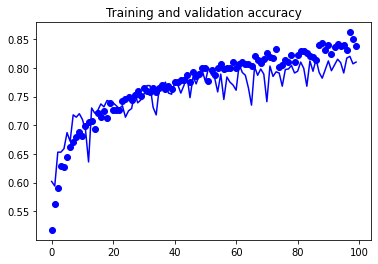

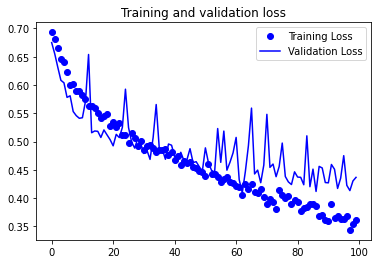

In [3]:

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
